In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import hamhelper.plotting as hp
# import hamhelper.colours as hc

# cmap = hc.HamColour.from_name('ptol_bright').cmap()
# print(cmap)

# Q1
> Consider a gas of N0 non-interacting atoms enclosed in a container of volume V0. Focus attention on any sub-volume V of this container and denote by N the number of molecules located within this sub-volume. Each atom is equally likely to be located anywhere within the container; hence the probability that a given atom is located within the sub-volume V is equal to V/V0. Using the ideas of the binomial distribution, answer the following questions:
![[Pasted image 20250113170952.png]]
#### (A) Mean number of atoms within sub-volume V
$\langle N \rangle$ within $V$ is given by: $\frac{\langle N \rangle}{V}=\frac{N_0}{V_0}$

#### (B) Relative fraction in the number of atoms within V
$\frac{\sigma ^2}{\left\langle N\right\rangle ^2}=\frac{\left\langle \left(N-\left\langle N\right\rangle \right)^2\right\rangle }{\left\langle N\right\rangle ^2}=\frac{\left\langle \left(N-N_0\cdot \frac{V}{V_0}\right)^2\right\rangle }{\left(\frac{N_0}{V_0}\right)^2}=\frac{\left\langle N^2-\left(\frac{N_0}{V_0}\right)^2V^2-2\frac{NN_0V}{V_0}\right\rangle }{\left(\frac{N_0}{V_0}\right)}$

#### (C) The limit as $V<<V_0$


#### (D) The limit as $V \rightarrow V_0$


# Q2
>Six monkeys, set to strum unintelligibly on typewriters for millions of years, would be bound in time to write all the books in the British Museum.” - Aldous Huxley This is a rather misleading statement. Could all the monkeys in the world have typed out ANY book during the age of the universe? Calculate the likelihood of the monkeys producing an ‘average’ book, Shakespeare’s Hamlet.
#### (A) A typewriter has 44 keys, assuming the length of Hamlet is 10^5 characters, what is the probability that an exact sequence of those characters forms?
This is asking if we have 10⁵ characters chosen from 44 uncorrelated options, what is the correct they are the exact right sequence. The probability comes from the number of permutations possible $\rightarrow 44^{(10^5)} \approx 10^{164345}$. This is large. The exact sequence is one of these many options,
$$\therefore P=\frac{1}{44^{(10^5)}} \approx 0$$
#### (B) What is the probability this will be typed over the age of the universe, assuming three monkeys per human all typing 10 keys per second?
Lets assume
$$  
\begin{matrix}
t=10^{18}~\textrm{seconds},\\
R=10~\textrm{characters per second, and}\\
N=3\times7.48\times 10^{9}~\textrm{monkeys.}
\end{matrix}
$$
Again, we consider the odds of choosing $10^5$ exact characters from a set of 44 options. This will be sampled from $L=t\times R\times N = 2.244\times 10^{30}$ characters. We can calculate the number of substrings as
$$
N_{\textrm{sub}} = L - (10^5 - 1) = 2.244\times 10^{30} - 10^5 + 1 \approx 2.244\times 10^{30}~\textrm{within computer error!}
$$

So, if each of these substrings has a chance of being the correct version of Hamlet, what is the probability considering all strings we get hamlet. We find
$$
P_{\textrm{tot}}=N_{\textrm{sub}}\times P= \frac{2.244\times 10^{30}}{44^{(10^5)}} \approx 0,
$$
so it does not matter! The number of ways to not arrange Hamlet are so many that there is no physical way for monkeys to do it (statistically).





# Q3
> There are an equal number of ripe (yellow) and unripe (green) bananas in a very large barrel. If a blindfolded monkey pulls bananas from the barrel, what is the probability that the monkey will get 215 ripe bananas if it grabs 400 bananas?

From a large bath of bananas, there is equal probability ($p=0.5=q$) for pulling a yellow or green banana respectively. This is essentially a random walk process of $n=400$ "steps" where we want to find the probability of being some total "steps" to the ripe banana side $n_R$ there are in total.
$$P\left(n_R\right)=\frac{n!}{n_R!\left(n-n_R\right)!}p^{n_R}q^{n-n_R}=\frac{400!}{215!\left(400-215\right)!}0.5^{215}0.5^{400-215}=0.012966\ \approx \frac{1.3}{100}$$

This is a pretty low chance! We would expect to see a result much closer to 200 flat.

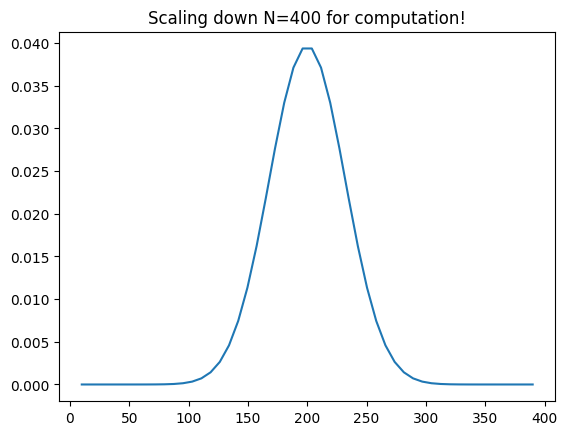

In [ ]:
N = 400
ns = np.linspace(1,39)

def P(n, N=40):
	return (sp.special.factorial(N)/(sp.special.factorial(n) * sp.special.factorial(N-n)))*(0.5)**n * (0.5)**(N-n)

p = P(ns)
# print(p)

ns *= 10
p *= np.sqrt(40)/np.sqrt(400)
plt.plot(ns, p, '-')
plt.title('Scaling down N=400 for computation!')
plt.show()

# Q4
> Consider a collection of seventy noninteracting spins that may either point up or down. How many microstates are there in this system? How can we label the macrostates in this system? If each microstate is equally probable, what is the most likely macrostate to find the system in, and what is the probability that we will find the system in this configuration? (From Kennett).

Letting
$$
	\begin{matrix}
	N=10~\textrm{non-interacting spins,}\\
	s=2~\textrm{states per spin},\\
	\end{matrix}
$$
meaning we have $s^N=2^{70}$ microstates. We can label the macrostates by the number of spin-up particles $n_u$. Assuming both up and down equally probably for all spins, the most likely macrostate is the one with the higher multiplicity $\Omega$. In other words when the entropy is highest. This occurs when $n_u=35=N/2$.
We can then calculate the probability of this system using the Binomial distribution
$$
P(n_u)=\frac{N!}{n_u!(N-n)!}(0.5)^{n_u}(0.5)^{N-n_u}=0.0950\approx\frac{1}{10},
$$
whose maximum occurs at $\frac{N}{2}=35$.

# Q5
> Perform a numerical simple calculation using **python** (or whatever program you like) of the random walk problem worked out in class but where the step length is given by a continuous exponential distribution of the form $P(x)=e^{-x}$ where $x$ is the step length in metres and varies from zero to infinity.
> 1. First, calculate the step length $\langle x \rangle$ and the variance of this distribution.
> 2. Then plot a histogram of 200 trials for $n$ random steps where $n=1,~10,~\textrm{and}~100$.
> 3. Comment on the shape of the observed distribution for the three cases.
> 4. Is the width of the distributions consistent wth theory?


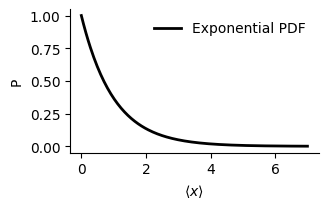

Mean = 1.00000
Variance = 1.00000


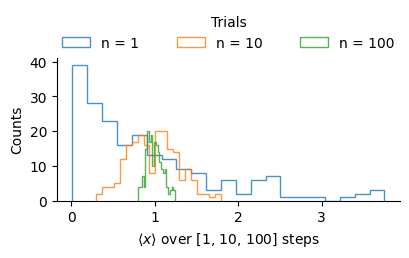

In [42]:
import scipy.stats as st
import hamhelper.plotting as hp
#noinput

def step_PDF(x):
	# Distribution of step lengths, continuous for x > 0
	return st.expon.pdf(x)

def draw_from_PDF(N=1):
	return st.expon.rvs(size=N)

fig, ax = plt.subplots(1, 1, figsize=np.array([3.3,2.2]))
x = np.linspace(0, 7, 200)
ax.plot(x, st.expon().pdf(x), 'k-', lw=2, label='Exponential PDF')
ax.legend(framealpha=0)
ax.set(xlabel=r'$\langle x \rangle$', ylabel='P')
hp.despine(ax)
plt.tight_layout()
plt.savefig('plots/A1_Q5_PDF.pdf', bbox_inches='tight')
plt.savefig('plots/A1_Q5_PDF.png', bbox_inches='tight', dpi=300)
plt.show()

# Get mean step lenth and distribution
mean, var, skew, kurt = st.expon.stats(moments='mvsk')
print(f"Mean = {mean:.5f}")
print(f"Variance = {var:.5f}")

N = 200  # Trials
ns = [1, 10, 100] #, 10, 100]#, 10, 100]  # Steps

# Generate trials
fig, ax = plt.subplots(1, 1, figsize=np.array([4.2,2.7]))
nbins = 41
bins = np.linspace(0,7,nbins+1)
bins=21
for n in ns:
    disp_array = []
    for trial in range(N):
        x_array = draw_from_PDF(n).copy()
        mean_disp = np.mean(x_array)
        stdev = np.std(x_array)
        var = stdev**2
        disp_array.append(mean_disp)
    
    disp_array = np.array(disp_array)
    # print(disp_array)
    counts, _bins = np.histogram(disp_array, bins=bins, density=False)
    ax.hist(_bins[:-1], _bins, weights=counts, label=f'n = {n}', histtype='step', alpha=0.8)

ax.set(xlabel=r'$\langle x\rangle$ over'+f' {ns} steps', ylabel='Counts')
ax.legend(framealpha=0, title='Trials', bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
		  mode="expand", borderaxespad=0, ncol=3)
hp.despine(ax)
plt.tight_layout()
ax.set(facecolor = "none")
plt.savefig('plots/A1_Q5_distributionOfDisplacements.pdf', bbox_inches='tight')
plt.savefig('plots/A1_Q5_distributionOfDisplacements.png', bbox_inches='tight', dpi=300)
plt.show()

The three distributions are histogrammed using the same bins and are not normalized. We note that in the case where $n=1$, we rebuild the original exponential distribution. This makes sense as we are sampling it directly and re-plotting it as a PDF as we take $N\rightarrow \inf$ samples. For larger $N$s, we approach a normal distribution under the Central Limit Theorem. For $n=10$ we already get close, however it is broad, skews left, and has a tail to the right. With $n=100$ we see a sharper and more symmetric distribution that looks closer to a normal distibution!

I chose not to normalize the histogram as it makes the behaviour of $n=1$ hard to see.

The width of the distributions decreases as we increase $n$ that we average over, agreeing with theory. We can take this a step further by finding the FWHM of each!

1 failed fit
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
n = 10	sigma = 0.29555384106444643
n = 100	sigma = 0.10444625777069466


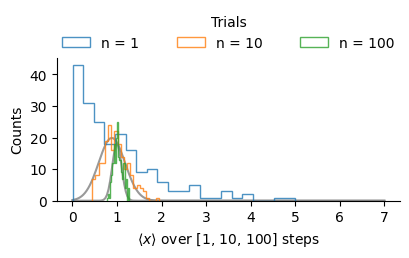

0.875950911866641
0.10435516278555652


In [ ]:
x = np.linspace(0, 7, 200)
N = 200  # Trials
ns = [1, 10, 100] #, 10, 100]#, 10, 100]  # Steps

# Generate trials
fig, ax = plt.subplots(1, 1, figsize=np.array([4.2,2.7]))
nbins = 41
bins = np.linspace(0,7,nbins+1)
bins=21
for n in ns:
    disp_array = []
    for trial in range(N):
        x_array = draw_from_PDF(n).copy()
        mean_disp = np.mean(x_array)
        stdev = np.std(x_array)
        var = stdev**2
        disp_array.append(mean_disp)
    
    disp_array = np.array(disp_array)
    # print(disp_array)
    counts, _bins = np.histogram(disp_array, bins=bins, density=False)
    ax.hist(_bins[:-1], _bins, weights=counts, label=f'n = {n}', histtype='step', alpha=0.8)
    
    
    def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    try:
        popt, pcov = sp.optimize.curve_fit(gaus,_bins[:-1], counts, p0=[20, 1, 1])
        print(f'n = {n}\tsigma = {np.abs(popt[2])}')
        
        y_model = gaus(x, *popt)
        ax.plot(x, y_model, color='grey', alpha=0.8, zorder=1)
        
    except Exception as e:
        print(f'{n} failed fit')
        print(e)


ax.set(xlabel=r'$\langle x\rangle$ over'+f' {ns} steps', ylabel='Counts')
ax.legend(framealpha=0, title='Trials', bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
		  mode="expand", borderaxespad=0, ncol=3)
hp.despine(ax)
plt.tight_layout()
ax.set(facecolor = "none")
plt.savefig('plots/A1_Q5_distributionOfDisplacements_fit.pdf', bbox_inches='tight')
plt.savefig('plots/A1_Q5_distributionOfDisplacements_fit.png', bbox_inches='tight', dpi=300)
plt.show()

We see:

$\sigma_{n=1} = 2.7$,

$\sigma_{n=10} = 0.33$ ,

$\sigma_{n=100} = 0.10 \approx \sigma_{n=10}\frac{\sqrt{10}}{\sqrt{100}}$,

so while the $n=1$ case doesn't follow the fit for the Gaussian distribution, the $n=10$ and $n=100$ distributions seem to follow the scaling low of their relative widths falling as $1/\sqrt{N}$!


# Q6
> A helium atom in a gas moves equal distances $l$ between collisions with equal probability in any direction. After a total of $N$ such displacements, what is the mean square displacement $\langle R^2 \rangle$ from its starting point? Treat the problem as 3 dimensional. After $N$ collisions, the vector displacement is $\vec R = \sum_{n=1}^N l\vec r_i$, where the direction of $\vec r_i$ is random (Adapted from Reif.).

The atom can move in any direction in 3D space by distance l.
$$\langle R^2 \rangle = l^2\sum_{i=1}^{N}\vec r_i \cdot \vec r_i = N l^2$$

|